In This week we learn about the image augmentation and data augmentation. This technique will help us to increase our datasets i.e. in cat vs dogg dataset we have 25k photos of dogs and cats but we could generate more photo of this dataset for example we could rotate the photo and etc.

one of the impact of using tensorflow library as a data augmentation tools is we don't need to save a lot image on our local drive.

the augmented data loaded into the memory and then use for learning approaches.

the augmentation also avoids model to overfitting by generating the unseen data that may our model be in counter with.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

--2021-06-05 04:08:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   114MB/s    in 0.6s    

2021-06-05 04:08:26 (114 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Now We want to augmented data with the Class name **ImageDataGenerator**

there are some extra attribute we can set to achieve more data and also avoid from overfitting on this dataset.



```
ImageDataGenerator(
    rescale = 1.0/255.0
    rotation_range = 40 #Can Set from (0, 180)
    width_shift_range=0.2 #Can Shift the image width
    heigth_shift_range=0.2 #Can Shift the image heigth
    shear_range=0.2 #rotate the photo
    zoom_range=0.2 #Maximize the zoom of given Photo
)
```



In [2]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True
)

validation_datagen = train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
)

In [3]:
train_generator = train_datagen.flow_from_directory(
    '/tmp/cats_and_dogs_filtered/train',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/cats_and_dogs_filtered/validation',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 40s 84ms/step - loss: 0.6921 - accuracy: 0.5295 - val_loss: 0.6733 - val_accuracy: 0.6170
Epoch 2/100
100/100 [==============================] - 8s 84ms/step - loss: 0.6609 - accuracy: 0.6050 - val_loss: 0.6522 - val_accuracy: 0.5960
Epoch 3/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6047 - accuracy: 0.6690 - val_loss: 0.6384 - val_accuracy: 0.6410
Epoch 4/100
100/100 [==============================] - 8s 84ms/step - loss: 0.5608 - accuracy: 0.7130 - val_loss: 0.6720 - val_accuracy: 0.6090
Epoch 5/100
100/100 [==============================] - 8s 84ms/step - loss: 0.5442 - accuracy: 0.7150 - val_loss: 0.5616 - val_accuracy: 0.7110
Epoch 6/100
100/100 [==============================] - 8s 83ms/step - loss: 0.5101 - accuracy: 0.7490 - val_loss: 0.5686 - val_accuracy: 0.6970
Epoch 7/100
100/100 [==============================] - 8s 85ms/step - loss: 0.4824 - accuracy: 0.7540 - val_loss: 0.5472 - val_accuracy

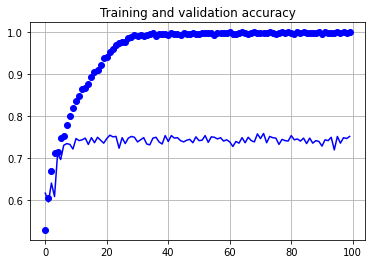

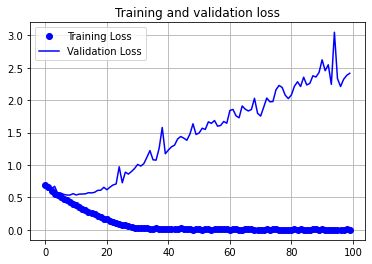

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid(True)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)


plt.show()

In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

--2021-06-05 04:36:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   315MB/s    in 0.2s    

2021-06-05 04:36:43 (315 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 - 17s - loss: 0.6949 - accuracy: 0.5165 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 2/10
100/100 - 16s - loss: 0.6904 - accuracy: 0.5345 - val_loss: 0.6780 - val_accuracy: 0.6000
Epoch 3/10
100/100 - 16s - loss: 0.6848 - accuracy: 0.5510 - val_loss: 0.6835 - val_accuracy: 0.5330
Epoch 4/10
100/100 - 16s - loss: 0.6749 - accuracy: 0.5690 - val_loss: 0.6481 - val_accuracy: 0.6600
Epoch 5/10
100/100 - 16s - loss: 0.6669 - accuracy: 0.6040 - val_loss: 0.6385 - val_accuracy: 0.6530
Epoch 6/10
100/100 - 16s - loss: 0.6544 - accuracy: 0.6095 - val_loss: 0.6059 - val_accuracy: 0.6880
Epoch 7/10
100/100 - 16s - loss: 0.6394 - accuracy: 0.6320 - val_loss: 0.5868 - val_accuracy: 0.7000
Epoch 8/10
100/100 - 16s - loss: 0.6335 - accuracy: 0.6305 - val_loss: 0.6301 - val_accuracy: 0.6160
Epoch 9/10
100/100 - 16s - loss: 0.6209 - accuracy: 0.6585 - val_loss: 0.5738 - val_accuracy: 0.6820
Epoch 1

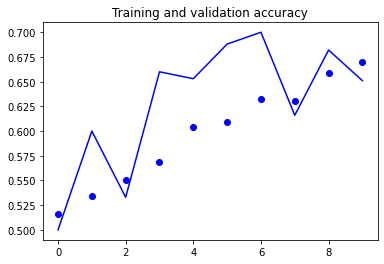

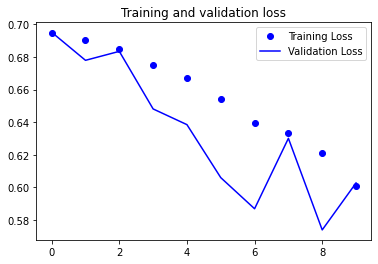

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()